In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Preprocessing and Metrics and Hyperparameter Tunning Libraries 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from yellowbrick.regressor import ResidualsPlot
import sklearn.decomposition as decomp
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Models Libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# Warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\warut\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df=pd.read_csv('CSV_DROOM_DATASET.csv')
df_1=df
#for col in df_1:
    #if df[col].dtypes=='object':
        #print(col, len(df_1[col].unique()))

"""
 Names of Columns - 
 0 - Name_of_Vehical	1 - Selling_Price	2 - On_Road_Price	3 - Rating	4 - Transparency_Score	5 - Seller_Score	
 6 - Health_Score	7 - Pricing_Score	 8 - Make	9 - Model	10 - Trim	11 - Year	12 - Exterior_Color	13 - Interior_Color	
 14 - Fuel_Type	15 - Transmission_Type	16 - Body_Type	17 - Interior_Furnishing	
 18 - Seating_Capacity	19 - Fuel_Tank_Capacity	20 - Location	21 - Registration_State	 22 - Kilometers_Driven	
 23 - Seller_Type	24 - Number_of_Owners	25 - Engine_Displacement	26 - Fuel_Efficiency


Initial Observations shows that there are 549 Rows and 27 columns. There are float64(7), int64(4), object(17). 
Columns and its data-type
|| int64 -  1   || int64 -  2   ||  int64 -  11 
|| float64 -  6 || float64 -  3 || float64 -  4 || float64 -  5 || float64 -  7 || float64 -  18 || float64 - 19 
|| object -  8  || object -  9  || object -  10 || object -  12 || object -  13 || object -  14  ||  object -  0 
|| object -  15 || object -  16 || object -  17 || object -  20 || object -  21
|| object -  22 || object -  23 || object -  24 || object -  25 || object -  26
Total Number of Null Values are - 351

"""
#print('Number of Rows and Columns - ',df_1.shape)
#print(df_1.info())
#print('Number of Null Values ',sum(df_1.isnull()))
#df_1.head()

"""
Handling the missing values and cleaning
Task - 
1. Cleaning column 10,22,25,26
2. Filling Null Values 
Null Values in Columns before haandling -
|| Col -  0 Null Values -  0    || Col -  1 Null Values -  0 || Col -  2 Null Values -  0 
|| Col -  3 Null Values -  0    || Col -  4 Null Values -  0 || Col -  5 Null Values -   0 || Col -  6 Null Values -  0 
|| Col -  7 Null Values -  0    || Col -  8 Null Values -  0 || Col -  9 Null Values -   0 || Col -  10 Null Values -  0 
|| Col -  11 Null Values -  0   || Col -  12 Null Values - 1 || Col -  13 Null Values -  2 || Col -  14 Null Values -  0 
|| Col -  15 Null Values -  6   || Col -  16 Null Values -19 || Col -  17 Null Values -  0 || Col -  18 Null Values -  223 
|| Col -  19 Null Values -  223 || Col -  20 Null Values - 0 || Col -  21 Null Values -  9 || Col -  22 Null Values -  0 
|| Col -  23 Null Values -  78  || Col -  24 Null Values - 3 || Col -  25 Null Values - 10 || Col -  26 Null Values -  108 
Mean -  
1     358177.673953
2     709064.100182
3          6.803825
4          5.981603
5          7.255373
6          5.869217
7          8.059927
11      2011.306011
19         5.024540
20        40.619632
23     59165.989071
26      1437.341373
27        18.299909
dtype: float64
"""
# 1. Cleaning column 10,22,25,26 done on MS Excel

# 2. For Null Values
        # 2.1 For Numeric Data
        # Filling Numeric values with column mean values
df_1.fillna(df_1.mean(),inplace=True)
        # 2.2 For Categorical Data
for col in df_1:
    if df_1[col].dtypes=='object':
        a=df_1[col].value_counts().index[0] #  Most occured value
        #print('Col - ',col,'Value Counts - ',a) 
        df_1[col].fillna(a,inplace=True) # Filling most occoured value
#for col in df_1:
    #print('Col - ',col,'Null Values - ',sum(df_1[col].isnull()),end=' || ')

"""
2. Columns wise number of null values after handling
|| Col -  0 Null Values -  0 || Col -  1 Null Values -  0 || Col -  2 Null Values -  0 || Col -  3 Null Values -  0 
|| Col -  4 Null Values -  0 || Col -  5 Null Values -  0 || Col -  6 Null Values -  0 || Col -  7 Null Values -  0 
|| Col -  8 Null Values -  0 || Col -  9 Null Values -  0 || Col -  10 Null Values -  0 || Col -  11 Null Values -  0 
|| Col -  12 Null Values -  0 || Col -  13 Null Values -  0 || Col -  14 Null Values -  0 || Col -  15 Null Values -  0 
|| Col -  16 Null Values -  0 || Col -  17 Null Values -  0 || Col -  18 Null Values -  0 || Col -  19 Null Values -  0 
|| Col -  20 Null Values -  0 || Col -  21 Null Values -  0 || Col -  22 Null Values -  0 || Col -  23 Null Values -  0 
|| Col -  24 Null Values -  0 || Col -  25 Null Values -  0 || Col -  26 Null Values -  0 || 
"""

"""
Preprocessing the data
Task - 
1. Convert the non-numeric data into numeric.
2. Spliting dataset into target and predictors
3. Split the data into train and test sets.
4. Scale the feature values to a uniform range.
"""
# 1. Convert the non-numeric data into numeric.
# To achieve this label encoding is used. Importing LabelEncoder form Sklearn.preprocessing
# Creacting object for LabelEncoder
label_encoder=LabelEncoder()
for col in df_1:
    if df_1[col].dtypes=='object':
        #print('Column - ',col)
        df_1[col]=label_encoder.fit_transform(df_1[col])
# 2. Spliting dataset into target and predictors
# Here target is to predict selling price from the available predictiors X=(Predictors) Column No. - Rest,
# y=Selling price column No. 1
a=pd.DataFrame(df_1['Name_of_Vehical']) #
b=pd.DataFrame(df_1['On_Road_Price']) #
c=pd.DataFrame(df_1['Rating'])
d=pd.DataFrame(df_1['Transparency_Score']) #
e=pd.DataFrame(df_1['Seller_Score'])
f=pd.DataFrame(df_1['Health_Score'])
g=pd.DataFrame(df_1['Pricing_Score']) #
h=pd.DataFrame(df_1['Make'])
i=pd.DataFrame(df_1['Model'])
j=pd.DataFrame(df_1['Trim'])
k=pd.DataFrame(df_1['Year']) #
l=pd.DataFrame(df_1['Exterior_Color']) #
m=pd.DataFrame(df_1['Interior_Color']) 
n=pd.DataFrame(df_1['Fuel_Type'])
o=pd.DataFrame(df_1['Transmission_Type'])
p=pd.DataFrame(df_1['Body_Type'])
q=pd.DataFrame(df_1['Interior_Furnishing']) #
r=pd.DataFrame(df_1['Seating_Capacity'])
s=pd.DataFrame(df_1['Fuel_Tank_Capacity']) #
t=pd.DataFrame(df_1['Location'])
u=pd.DataFrame(df_1['Registration_State'])
v=pd.DataFrame(df_1['Kilometers_Driven'])
w=pd.DataFrame(df_1['Seller_Type']) #
x=pd.DataFrame(df_1['Number_of_Owners'])
y=pd.DataFrame(df_1['Engine_Displacement']) #
z=pd.DataFrame(df_1['Fuel_Efficiency'])
target=pd.DataFrame(df_1['Selling_Price'])

X=pd.concat([a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,y,z],axis=1)
y=pd.concat([target],axis=1)
#print(X.head())
# Converting the DataFrame to a NumPy array
X=X.values
y=y.values

# 3. Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


[[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245C970AAC8>


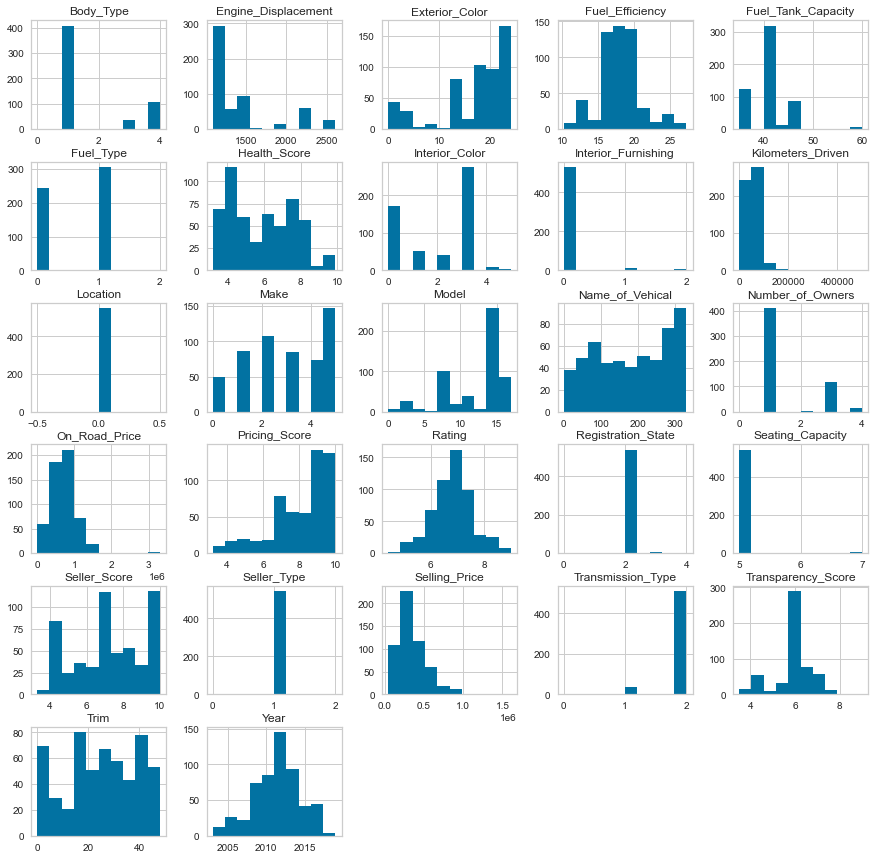

In [3]:
"""
Taking look at initial processed data
"""
"""
 0 - Name_of_Vehical	1 - Selling_Price	2 - On_Road_Price	3 - Rating	4 - Transparency_Score	5 - Seller_Score	
 6 - Health_Score	7 - Pricing_Score	 8 - Make	9 - Model	10 - Trim	11 - Year	12 - Exterior_Color	13 - Interior_Color	
 14 - Fuel_Type	15 - Transmission_Type	16 - Body_Type	17 - Interior_Furnishing	18 - Seating_Capacity	
 19 - Fuel_Tank_Capacity	20 - Location	21 - Registration_State	 22 - Kilometers_Driven	23 - Seller_Type	
 24 - Number_of_Owners	25 - Engine_Displacement	26 - Fuel_Efficiency
"""
# 1. Ploting
print(pd.DataFrame.hist(df_1,figsize=[15,15]))

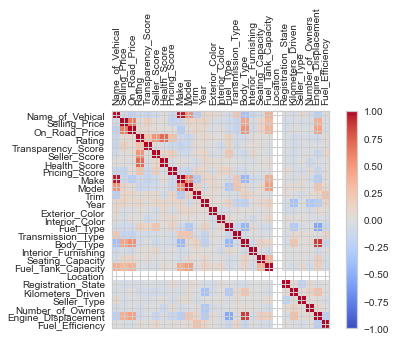

In [4]:
# 2. Co-relation Matrix
#df_1.corr()
### Visualising the Correlation through Heat Map
corr = df_1.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_1.columns)
ax.set_yticklabels(df_1.columns)
plt.show()

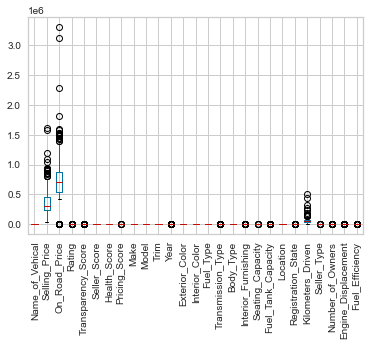

In [5]:
# 3. Box-Plot
df_1.boxplot(rot=90)

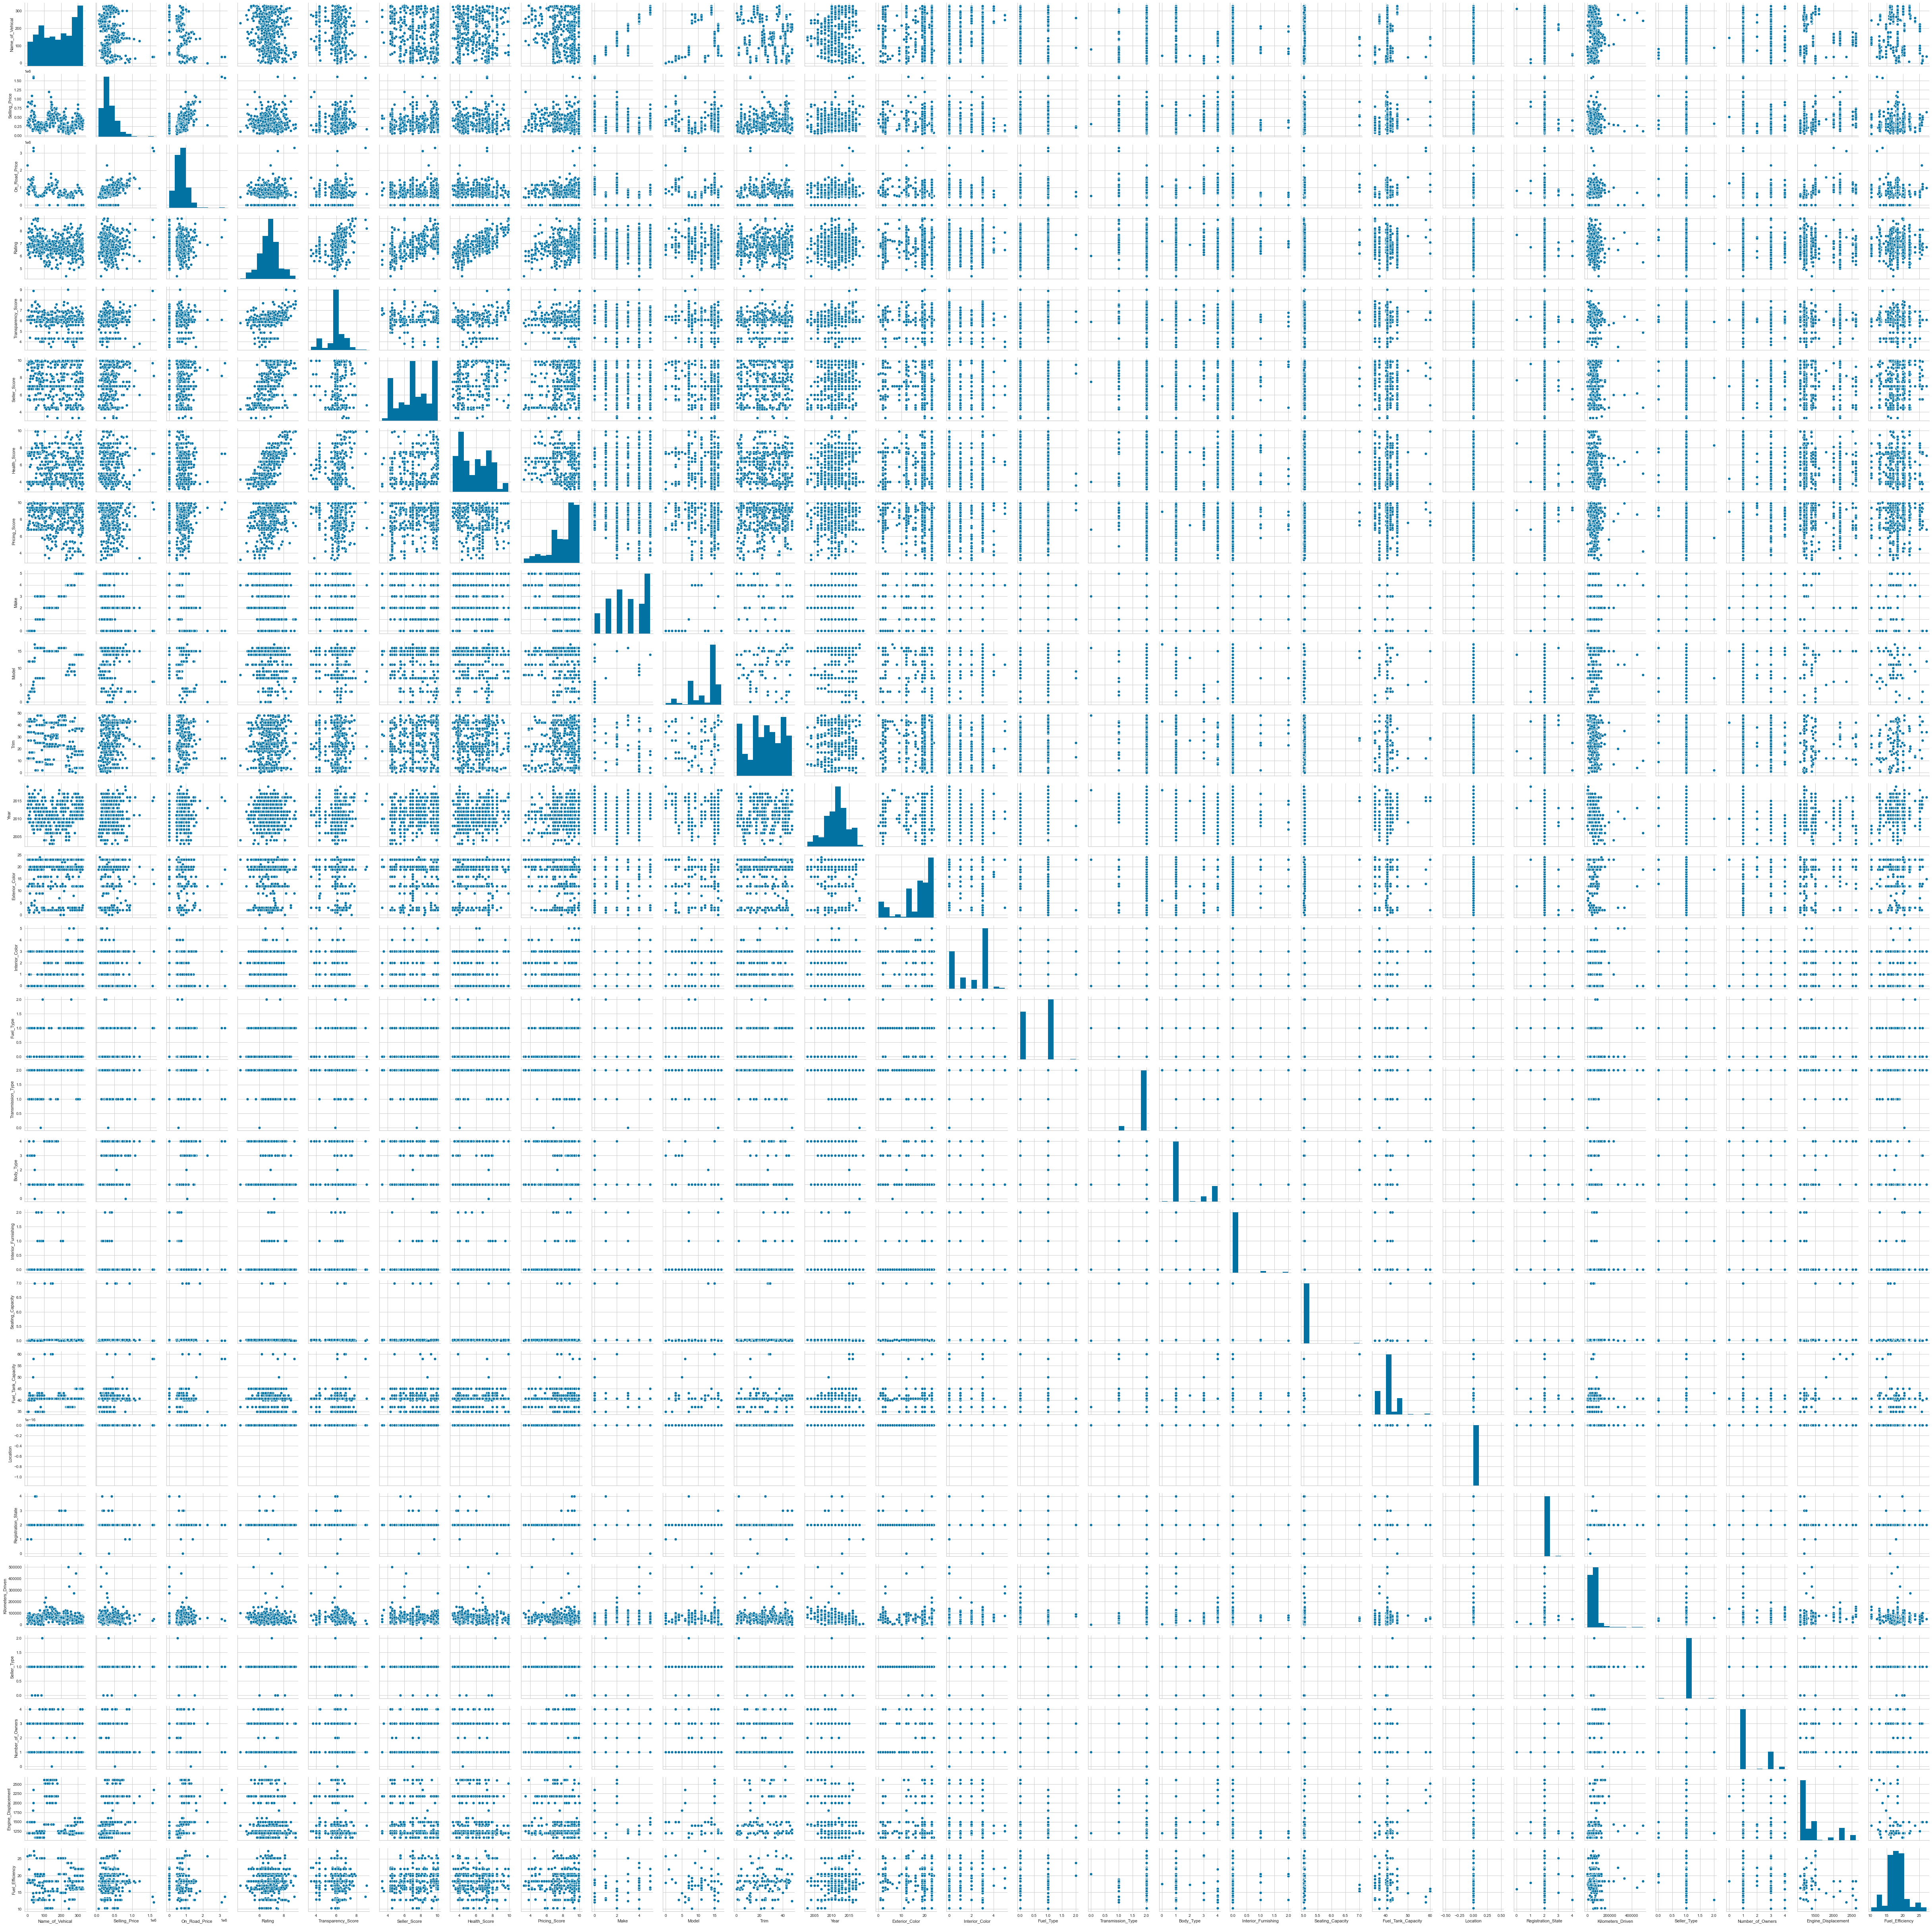

In [4]:
sns.pairplot(df_1)

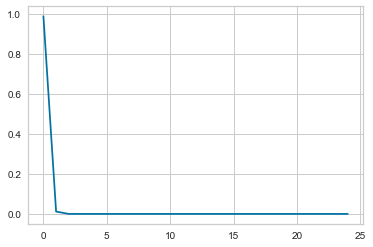

In [7]:
pca=decomp.PCA()
pca.fit(X)
#print('Components:',pca.components_)
#print('Explained Variance Ratio',pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_) # Elbow diagram
plt.show()

In [8]:
x_vif=df_1
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_vif.values,i) for i in range(x_vif.shape[1])]
vif['Feature - x']=x_vif.columns
vif.round(1)

,VIF,Feature - x
0,73.1,Name_of_Vehical
1,9.2,Selling_Price
2,10.9,On_Road_Price
3,656.2,Rating
4,103.2,Transparency_Score
5,36.7,Seller_Score
6,60.3,Health_Score
7,50.8,Pricing_Score
8,86.4,Make
9,27.1,Model


---------------  Linear Regression  ------------------


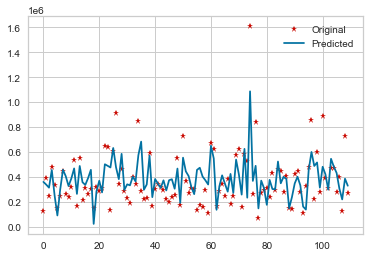

Train RMSE -  127617.74622908508
Test RMSE -  153389.09279227201
Mean Cross Validation MSE -  150649.6199261626
R-square Value -  0.5164596299051736
Mean Cross Validation Score - R-Square -  -0.1678368785867837


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     19.80
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           2.11e-54
Time:                        14:23:59   Log-Likelihood:                -5784.1
No. Observations:                 439   AIC:                         1.162e+04
Df Residuals:                     414   BIC:                         1.172e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.993e+07   4.92e+06     -4.050      0.000   -2.96e+07   -1.03e+07
x1           992.5126    242.925      4.086      0.000     514.992    1470.033
x2             0.2176      0.024      8.916      0.000       0.170       0.266
x3          1.702e+04   2.35e+04      0.725      0.469   -2.91e+04    6.32e+04
x4          1.703e+04   1.06e+04      1.607      0.109   -3803.477    3.79e+04
x5          -766.0973   4956.930     -0.155      0.877   -1.05e+04    8977.793
x6         -2139.9322   7893.164     -0.271      0.786   -1.77e+04    1.34e+04
x7         -2.166e+04   5331.071     -4.064      0.000   -3.21e+04   -1.12e+04
x8          -5.43e+04   1.71e+04     -3.172      0.002   -8.79e+04   -2.07e+04
x9          3192.9811   2602.158      1.227      0.221   -1922.109    8308.071
x10          388.6659    584.952      0.664      0.507    -761.181    1538.513
x11         1.019e+04   2458.537      4.144      0.000    5356.294     1.5e+04
x12        -2010.5968    961.007     -2.092      0.037   -3899.659    -121.534
x13        -9897.2474   4718.858     -2.097      0.037   -1.92e+04    -621.338
x14         -802.3827   1.75e+04     -0.046      0.963   -3.52e+04    3.36e+04
x15         -3.68e+04   2.65e+04     -1.391      0.165   -8.88e+04    1.52e+04
x16         2.495e+04   1.19e+04      2.095      0.037    1540.862    4.84e+04
x17         3.262e+04   2.81e+04      1.162      0.246   -2.26e+04    8.78e+04
x18        -4.686e+04   3.97e+04     -1.182      0.238   -1.25e+05    3.11e+04
x19         4064.8695   2826.454      1.438      0.151   -1491.121    9620.860
x20        -5.755e-10    2.7e-10     -2.131      0.034   -1.11e-09   -4.46e-11
x21        -7.547e+04   4.08e+04     -1.848      0.065   -1.56e+05    4797.697
x22           -0.1083      0.162     -0.667      0.505      -0.427       0.211
x23         -2.13e+05   7.14e+04     -2.984      0.003   -3.53e+05   -7.27e+04
x24           32.7673     36.462      0.899      0.369     -38.906     104.441
x25          874.9456   2538.112      0.345      0.730   -4114.247    5864.138
==============================================================================
Omnibus:                       70.971   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.346
Skew:                           0.867   Prob(JB):                     2.25e-33
Kurtosis:                       5.283   Cond. No.                     1.13e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.07e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [9]:
# Multiple Linear Regression 
linear_regression=LinearRegression(fit_intercept=True,normalize=False)
linear_regression.fit(X_train,y_train)
y_true_lr_train,y_pred_lr_train=y_train,linear_regression.predict(X_train)
y_true_lr_test,y_pred_lr_test=y_test,linear_regression.predict(X_test)
# Ploting test results
print('---------------  Linear Regression  ------------------')
plt.plot(y_true_lr_test,'r*',label='Original')
plt.plot(y_pred_lr_test,label='Predicted')
plt.legend()
plt.show()
# Quality Metrics
rmse_lr_train=mean_squared_error(y_true_lr_train,y_pred_lr_train)
rmse_lr_test=mean_squared_error(y_true_lr_test,y_pred_lr_test)
print('Train RMSE - ',np.sqrt(rmse_lr_train))
print('Test RMSE - ',np.sqrt(rmse_lr_test))
# Cross Validation 10-Flod
MSE_CV_lr=-cross_val_score(linear_regression,X,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)
R2_CV_lr=cross_val_score(linear_regression,X,y,cv=10)
print('Mean Cross Validation MSE - ',np.sqrt(MSE_CV_lr.mean()))
print('R-square Value - ',linear_regression.score(X_test,y_test))
print('Mean Cross Validation Score - R-Square - ',np.mean(R2_CV_lr))
X_OLS = X_train
X_OLS = sm.add_constant(X_OLS)
regr2 = sm.OLS(y_train,X_OLS)
model = regr2.fit()
model.summary()

---------------- Residual Plot  ----------------- 


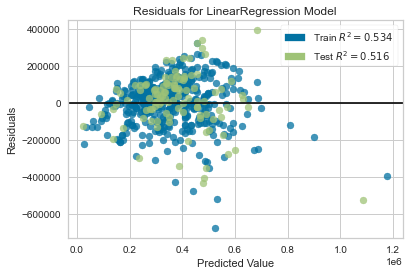

In [10]:
# Residuals Plot
print('---------------- Residual Plot  ----------------- ')
visualizer = ResidualsPlot(linear_regression, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()


 ---------------  Ridge Linear Regression  ------------------


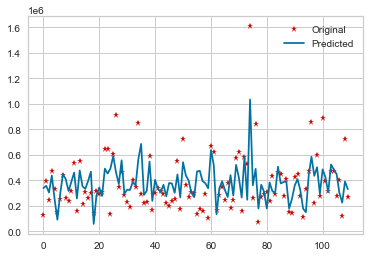

Score -  0.5228430294823014
Train RMSE -  129185.4768194396
Test RMSE -  155370.04220215723
Mean Cross Validation MSE -  149898.0823885495
R-square Value -  0.5182275137556023
Mean Cross Validation Score - R-Square -  [ 0.0847608  -1.10117732  0.16959831 -0.19252225  0.28421926 -0.23152553
 -0.38371059  0.36419368  0.03571487  0.19138623]


In [11]:
# Regularization
# Ridge
linear_regression_ridge=Ridge(alpha=0.1,normalize=True)
linear_regression_ridge.fit(X_train,y_train)
y_true_ri_train,y_pred_ri_train=y_train,linear_regression_ridge.predict(X_train)
y_true_ri_test,y_pred_ri_test=y_test,linear_regression_ridge.predict(X_test)
# Ploting test results
print('\n ---------------  Ridge Linear Regression  ------------------')
plt.plot(y_true_ri_test,'r*',label='Original')
plt.plot(y_pred_ri_test,label='Predicted')
plt.legend()
plt.show()
# Quality Metrics
rmse_ri_train=mean_squared_error(y_true_ri_train,y_pred_ri_train)
rmse_ri_test=mean_squared_error(y_true_ri_test,y_pred_ri_test)
print('Score - ', linear_regression_ridge.score(X_train,y_train))
print('Train RMSE - ',np.sqrt(rmse_ri_train))
print('Test RMSE - ',np.sqrt(rmse_ri_test))
# Cross Validation 10-Flod
MSE_CV_ri=-cross_val_score(linear_regression_ridge,X,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)
R2_CV_ri=cross_val_score(linear_regression_ridge,X,y,cv=10)
print('Mean Cross Validation MSE - ',np.sqrt(MSE_CV_ri.mean()))
print('R-square Value - ',linear_regression_ridge.score(X,y))
print('Mean Cross Validation Score - R-Square - ',(R2_CV_ri))



 ---------------  Lasso Linear Regression  ------------------


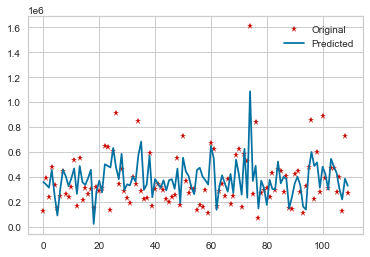

Train RMSE -  127617.74841764799
Test RMSE -  153390.55856354008
Mean Cross Validation MSE -  150645.47561075946
R-square Value -  0.5164503885314231
Mean Cross Validation Score - R-Square -  [-0.04985247 -1.69006412 -0.00543226 -0.10884025  0.28157899 -0.29189757
 -0.52067062  0.42950436  0.05341897  0.22622159]


In [32]:
# Lasso
linear_regression_lasso=Lasso(alpha=0.1,normalize=True)
linear_regression_lasso.fit(X_train,y_train)
y_true_la_train,y_pred_la_train=y_train,linear_regression_lasso.predict(X_train)
y_true_la_test,y_pred_la_test=y_test,linear_regression_lasso.predict(X_test)
# Ploting test results
print('\n ---------------  Lasso Linear Regression  ------------------')
plt.plot(y_true_la_test,'r*',label='Original')
plt.plot(y_pred_la_test,label='Predicted')
plt.legend()
plt.show()
# Quality Metrics
rmse_la_train=mean_squared_error(y_true_la_train,y_pred_la_train)
rmse_la_test=mean_squared_error(y_true_la_test,y_pred_la_test)
print('Train RMSE - ',np.sqrt(rmse_la_train))
print('Test RMSE - ',np.sqrt(rmse_la_test))
# Cross Validation 10-Flod
MSE_CV_la=-cross_val_score(linear_regression_lasso,X,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)
R2_CV_la=cross_val_score(linear_regression_lasso,X,y,cv=10)
print('Mean Cross Validation MSE - ',np.sqrt(MSE_CV_la.mean()))
print('R-square Value - ',linear_regression_lasso.score(X_test,y_test))
print('Mean Cross Validation Score - R-Square - ',(R2_CV_la))

In [26]:
# Tunning The Model Hyperparameters Grid Search Cross Validation
# Lasso
alphas = np.arange(0,50,0.1)
linear_regression_lasso_grid=Lasso(alpha=0.1,normalize=True)
lasso_grid=GridSearchCV(linear_regression_lasso_grid,param_grid=dict(alpha=alphas),cv=10)
lasso_grid.fit(X,y)
y_true_lr_grid_train,y_pred_lr_grid_train=y_train,lasso_grid.predict(X_train)
y_true_lr_grid_test,y_pred_lr_grid_test=y_test,lasso_grid.predict(X_test)
rmse_la_grid_train=mean_squared_error(y_true_lr_grid_train,y_pred_lr_grid_train)
rmse_la_grid_test=mean_squared_error(y_true_lr_grid_test,y_pred_lr_grid_test)
print('----------------------------Grid Search Lasso -------------------------')
print('Train RMSE - ',np.sqrt(rmse_la_grid_train))
print('Test RMSE - ',np.sqrt(rmse_la_grid_test))
print('Best Hyper-parameter Lasso Alpha - ',lasso_grid.best_params_)
print('Best Score Lasso - ',lasso_grid.best_score_)

# Ridge
alphas = np.arange(0,50,0.1)
linear_regression_ridge_grid=Ridge(alpha=0.1,normalize=True)
ridge_grid=GridSearchCV(linear_regression_ridge_grid,param_grid=dict(alpha=alphas),cv=10)
ridge_grid.fit(X,y)
y_true_ri_grid_train,y_pred_ri_grid_train=y_train,ridge_grid.predict(X_train)
y_true_ri_grid_test,y_pred_ri_grid_test=y_test,ridge_grid.predict(X_test)
rmse_ri_grid_train=mean_squared_error(y_true_ri_grid_train,y_pred_ri_grid_train)
rmse_ri_grid_test=mean_squared_error(y_true_ri_grid_test,y_pred_ri_grid_test)
print('----------------------------Grid Search Ridge -------------------------')
print('Train RMSE - ',np.sqrt(rmse_ri_grid_train))
print('Test RMSE - ',np.sqrt(rmse_ri_grid_test))
print('Best Hyper-parameter Ridge Alpha - ',ridge_grid.best_params_)
print('Best Score Ridge - ',ridge_grid.best_score_)

----------------------------Grid Search Lasso -------------------------
Train RMSE -  128792.34576065274
Test RMSE -  147283.70412640774
Best Hyper-parameter Lasso Alpha -  {'alpha': 49.900000000000006}
Best Score Lasso -  -0.10052543748293244
----------------------------Grid Search Ridge -------------------------
Train RMSE -  132862.60837181835
Test RMSE -  154796.467383685
Best Hyper-parameter Ridge Alpha -  {'alpha': 0.4}
Best Score Ridge -  -0.05215015949411835
